`Martín Alexis Martínez Andrade`

**This notebook was made in Google Colab.**

# Libraries

* pandas
* numpy
* matplotlib

# P2: Descriptive Statistics

## (Optional) Download clean_data.csv from Dropbox

In [1]:
# download file from dropbox
!wget -O clean_data.csv https://www.dropbox.com/scl/fi/0gijhoxqxhjbekd4kgfgc/clean_data.csv?rlkey=rer17vpg5e17t949ouk1a561c&st=k860xynh&dl=1

--2025-09-08 05:29:04--  https://www.dropbox.com/scl/fi/0gijhoxqxhjbekd4kgfgc/clean_data.csv?rlkey=rer17vpg5e17t949ouk1a561c
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc1314123574cc1fe685d61e9da.dl.dropboxusercontent.com/cd/0/inline/Cw-rYdp3C4ecCFuGj0Ejh8g3Oi0V5Upj0xKZ_5UGhUnXsNi3rSetDKirJ4JiMPG5zpWHgATKENTqMU-tgPA-1xUaWVRhIrjj2gvqGZWPX-zVJV1Svodpky6fzireQ92lnjBS4-6kcT0rN0WSkkCMSGxA/file# [following]
--2025-09-08 05:29:05--  https://ucc1314123574cc1fe685d61e9da.dl.dropboxusercontent.com/cd/0/inline/Cw-rYdp3C4ecCFuGj0Ejh8g3Oi0V5Upj0xKZ_5UGhUnXsNi3rSetDKirJ4JiMPG5zpWHgATKENTqMU-tgPA-1xUaWVRhIrjj2gvqGZWPX-zVJV1Svodpky6fzireQ92lnjBS4-6kcT0rN0WSkkCMSGxA/file
Resolving ucc1314123574cc1fe685d61e9da.dl.dropboxusercontent.com (ucc1314123574cc1fe685d61e9da.dl.dropboxusercontent.com)... 162.125.81.15, 

## Load dataset

In [2]:
import pandas as pd

df = pd.read_csv(f"clean_data.csv")

## Central tendencies and dispersion

In [3]:
print(df.describe(include="int64")[["HelpfulnessNumerator", "HelpfulnessDenominator", "Score"]])

print("\n**Variance**")
print(df[["HelpfulnessNumerator", "HelpfulnessDenominator", "Score"]].var())

print("\n**Interquartile Range**")
print(df[["HelpfulnessNumerator", "HelpfulnessDenominator", "Score"]].quantile(0.75) - df[["HelpfulnessNumerator", "HelpfulnessDenominator", "Score"]].quantile(0.25))

       HelpfulnessNumerator  HelpfulnessDenominator          Score
count         396288.000000           396288.000000  396288.000000
mean               1.739573                2.212797       4.177222
std                6.879975                7.546638       1.314381
min                0.000000                0.000000       1.000000
25%                0.000000                0.000000       4.000000
50%                0.000000                1.000000       5.000000
75%                2.000000                2.000000       5.000000
max              866.000000              923.000000       5.000000

**Variance**
HelpfulnessNumerator      47.334056
HelpfulnessDenominator    56.951750
Score                      1.727598
dtype: float64

**Interquartile Range**
HelpfulnessNumerator      2.0
HelpfulnessDenominator    2.0
Score                     1.0
dtype: float64


## Add a HelpfulnessScore column

It would be useful to have a HelpfulnessNumerator/Denominator column to avoid boilerplate code.

In [4]:
# create a HelpfulnessScore column
df["HelpfulnessScore"] = df["HelpfulnessNumerator"] / df["HelpfulnessDenominator"]

print(df["HelpfulnessScore"].head())
print(df["HelpfulnessScore"].describe())

num_of_nulls = df["HelpfulnessScore"].isna().sum()
# percentage of nulls
print(f"Number of NaN values in HelpfulnessScore: {num_of_nulls} | Percentage: {num_of_nulls / df.shape[0] * 100:.2f}%")


0    1.0
1    NaN
2    1.0
3    1.0
4    NaN
Name: HelpfulnessScore, dtype: float64
count    210849.000000
mean          0.785923
std           0.341392
min           0.000000
25%           0.666667
50%           1.000000
75%           1.000000
max           1.000000
Name: HelpfulnessScore, dtype: float64
Number of NaN values in HelpfulnessScore: 185439 | Percentage: 46.79%


~47% of the reviews haven't been voted by other users as helpful or not helpful. Dropping these reviews would reduce dramatically the statistical power of future analysis; also, it's not mandatory dropping them, as it's not an essential column for most analysis.

## Distributions

### Score

Score
1     36799
2     20907
3     29905
4     56330
5    252347
Name: count, dtype: int64


<BarContainer object of 5 artists>

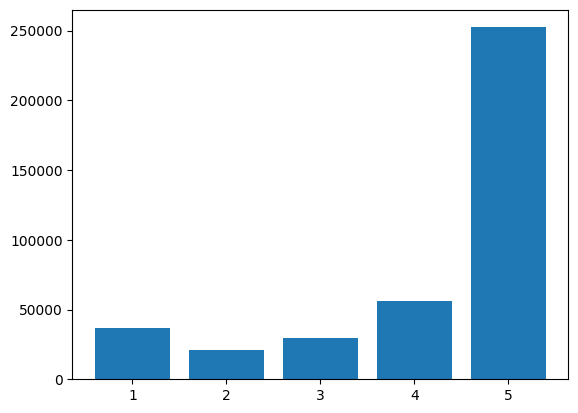

In [5]:
freq = df["Score"].value_counts().sort_index(inplace=False)
print(freq)

# Plot
import matplotlib.pyplot as plt
plt.bar(freq.index, freq.values)

Most reviews have a high score (5 stars category is predominant). The score distribution is biased towards positive values.

### HelpfulnessScore

Number of bins: 18
(-0.002, 0.0556]     23004
(0.0556, 0.111]        626
(0.111, 0.167]        1097
(0.167, 0.222]        1082
(0.222, 0.278]        1654
(0.278, 0.333]        4011
(0.333, 0.389]         423
(0.389, 0.444]        1607
(0.444, 0.5]         14872
(0.5, 0.556]           445
(0.556, 0.611]        2043
(0.611, 0.667]        8018
(0.667, 0.722]        1222
(0.722, 0.778]        5087
(0.778, 0.833]        3731
(0.833, 0.889]        5374
(0.889, 0.944]        3090
(0.944, 1.0]        133463
Name: count, dtype: int64


(array([ 22995.,    500.,    794.,   1388.,   1771.,    527.,   3922.,
          1444.,    372.,  14905.,   2246.,    694.,   8524.,   5109.,
          3731.,   4684.,   3651., 133592.]),
 array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
        0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ,
        0.55555556, 0.61111111, 0.66666667, 0.72222222, 0.77777778,
        0.83333333, 0.88888889, 0.94444444, 1.        ]),
 <BarContainer object of 18 artists>)

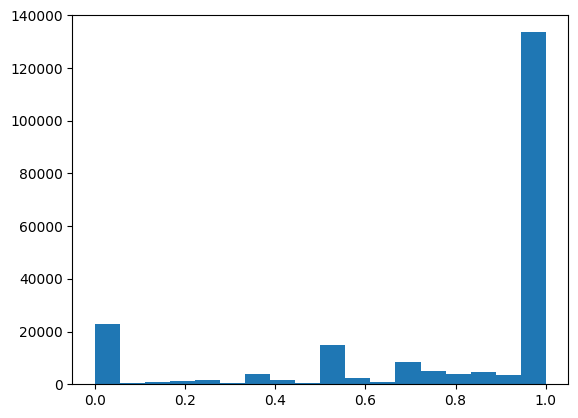

In [6]:
import numpy as np

# make intervals and then calculate frequency for HelpfulnessScore following the Sturges' rule
voted_reviews = df.dropna(subset=["HelpfulnessScore"], inplace=False)
n = voted_reviews.shape[0]
number_of_bins = int(1 + 3.322 * np.log10(n))
print(f"Number of bins: {number_of_bins}")

# frecuencies
freq = voted_reviews["HelpfulnessScore"].value_counts(bins=number_of_bins).sort_index(inplace=False)
print(freq)

plt.hist(df["HelpfulnessScore"], bins=number_of_bins)

Most reviews have a high helpfulness score (reviews are often voted as useful by other users). The helpfulness score distribution is highly biased towards positive values.

Number of null HelpfulnessScore rows: 185439 | Percentage: 46.79%


<BarContainer object of 2 artists>

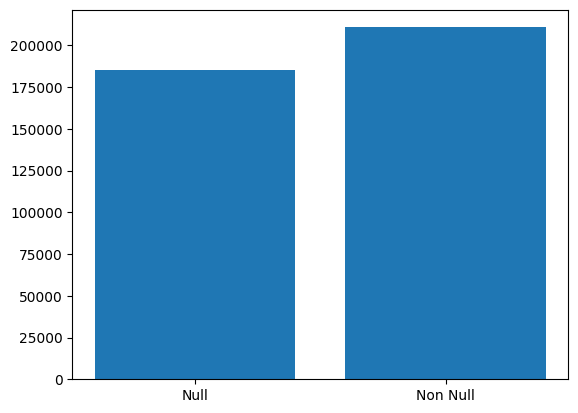

In [7]:
num_of_nulls = df["HelpfulnessScore"].isna().sum()
n = df.shape[0]

print(f"Number of null HelpfulnessScore rows: {num_of_nulls} | Percentage: {num_of_nulls / df.shape[0] * 100:.2f}%")

plt.bar(["Null", "Non Null"], [num_of_nulls, n - num_of_nulls])

As mentioned before, ~47% of the reviews are not voted by other users.

## Statistics from grouped data

### Entities

#### User

In [8]:
# calculate statistics per user
user_stats = df.groupby('UserId').agg(
    total_reviews = ('Id', 'count'),
    avg_score = ('Score', 'mean'),
    median_score = ('Score', 'median'),
    std_score = ('Score', 'std'),
    avg_helpfulness_score = ('HelpfulnessScore', 'mean')
).sort_values('total_reviews', ascending=False)

print("User statistics")
print(user_stats.head())

User statistics
                total_reviews  avg_score  median_score  std_score  \
UserId                                                              
AY12DBB0U420B             329   4.659574           5.0   0.657676   
A3OXHLG6DIBRW8            319   4.579937           5.0   0.628744   
A1YUL9PCJR3JTY            263   4.589354           5.0   0.610500   
A281NPSIMI1C2R            260   4.788462           5.0   0.560493   
A1Z54EM24Y40LL            211   4.383886           5.0   0.975669   

                avg_helpfulness_score  
UserId                                 
AY12DBB0U420B                0.929984  
A3OXHLG6DIBRW8               0.977760  
A1YUL9PCJR3JTY               0.948034  
A281NPSIMI1C2R               0.834189  
A1Z54EM24Y40LL               0.892291  


##### Get users with at least 10 reviews and sort them by mean helpfulness score

In [9]:
# get just the users with at least N reviews
n_rev = 10
users_with_considerable_reviews = user_stats[user_stats["total_reviews"] >= n_rev]

# drop users that haven't been voted and sort by helpfulness score
users_with_considerable_reviews = users_with_considerable_reviews.dropna(
    subset=["avg_helpfulness_score"], inplace=False
).sort_values('avg_helpfulness_score', ascending=True)

There might be some users with less than 0.5 mean helpfulness score and 10 or more reviews (which means they're consistent). Let's categorize them as "trolls".

In [10]:
trolls = users_with_considerable_reviews[users_with_considerable_reviews["avg_helpfulness_score"] < 0.5]
num_trolls = trolls.shape[0]
num_of_users_with_considerable_reviews = users_with_considerable_reviews.shape[0]
print(f"Number of trolls: {num_trolls} | Percentage of trolls: {num_trolls / num_of_users_with_considerable_reviews * 100 : .2f}%")

Number of trolls: 375 | Percentage of trolls:  14.47%


**14.47% of users are trolls (consistently low usefulness scores in their reviews)**.

#### Products

In [11]:
# Calculate statistics per product
product_stats = df.groupby('ProductId').agg(
    total_reviews = ('Id', 'count'),
    avg_score = ('Score', 'mean'),
    median_score = ('Score', 'median'),
    mode_score = ('Score', lambda x: x.mode() if len(x.mode()) > 0 else None),
    std_score = ('Score', 'std')
).sort_values('total_reviews', ascending=False)

print("Product statistics")
print(product_stats.head())

Product statistics
            total_reviews  avg_score  median_score mode_score  std_score
ProductId                                                               
B007JFMH8M            912   4.582237           5.0          5   0.705811
B002QWP89S            631   4.587956           5.0          5   0.968445
B003B3OOPA            623   4.739968           5.0          5   0.668389
B001EO5Q64            567   4.746032           5.0          5   0.697584
B0013NUGDE            563   4.309059           5.0          5   1.152302


##### Get least controversial products

We can use the standard deviation as a measure of how controversial a product is. Low std means there's a general agreement on the mean score; high std means the mean score is controversial.

In [12]:
# get products with at least 200 total_reviews
n_total_reviews = 200
products_by_std_score = product_stats[product_stats["total_reviews"] >= n_total_reviews]
# order by std_score
products_by_std_score = products_by_std_score.sort_values('std_score', ascending=True)

print(products_by_std_score.head())

            total_reviews  avg_score  median_score mode_score  std_score
ProductId                                                               
B000NMJWZO            542   4.881919           5.0          5   0.487255
B000GAT6NG            389   4.802057           5.0          5   0.604447
B003QDRJXY            264   4.837121           5.0          5   0.610417
B005BRHVD6            224   4.665179           5.0          5   0.655738
B003B3OOPA            623   4.739968           5.0          5   0.668389


In [13]:
# get the std_score that are less or equal to 1
least_controversial_products = products_by_std_score[products_by_std_score["std_score"] <= 0.75]

print(least_controversial_products)
print(f"Number of least controversial products: {least_controversial_products.shape[0]}")

            total_reviews  avg_score  median_score mode_score  std_score
ProductId                                                               
B000NMJWZO            542   4.881919           5.0          5   0.487255
B000GAT6NG            389   4.802057           5.0          5   0.604447
B003QDRJXY            264   4.837121           5.0          5   0.610417
B005BRHVD6            224   4.665179           5.0          5   0.655738
B003B3OOPA            623   4.739968           5.0          5   0.668389
B000V17MLS            223   4.704036           5.0          5   0.672719
B001EO5Q64            567   4.746032           5.0          5   0.697584
B007JFMH8M            912   4.582237           5.0          5   0.705811
B0051COPH6            379   4.469657           5.0          5   0.705985
Number of least controversial products: 9


**There are 9 products which have 200+ scores that are generally shared among buyers**. Also, we can see their average scores are no less than 4. Thus, we should promote them in the landing page: they're popular but also consistently highly valued by buyers.

#### Reviews

##### Are longer reviews more helpful?

Let's start by creating two columns: `ReviewLength` and `LengthCategory`.

In [14]:
# create a column "ReviewLength"
df["ReviewLength"] = df["Text"].apply(lambda x: len(x))

# create length categories (quartiles)
length_categories=['very_short', 'short', 'long', 'very_long']
df['LengthCategory'] = pd.qcut(df['ReviewLength'], q=4, labels=length_categories)

Let's group reviews by length quantiles

Average helpfulness score by review length category:
LengthCategory
very_short    0.736016
short         0.787498
long          0.799443
very_long     0.809919
Name: HelpfulnessScore, dtype: float64


/tmp/ipython-input-851970908.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_helpfulness_by_length = reviews_with_helpfulness.groupby('LengthCategory')['HelpfulnessScore'].mean()


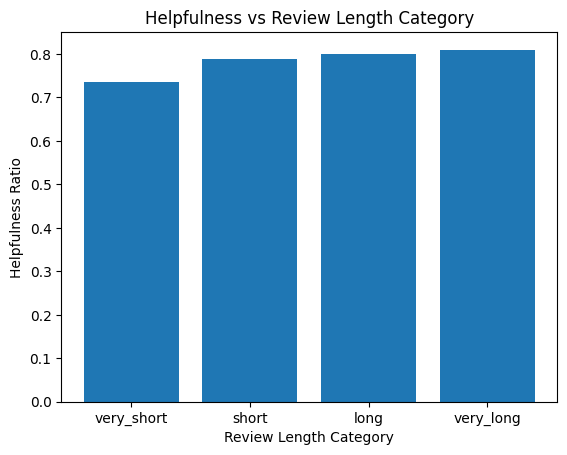

In [15]:
# drop null HelpfulnessScore values
reviews_with_helpfulness = df.dropna(subset=["HelpfulnessScore"], inplace=False)

# get average helpfulness by length category
avg_helpfulness_by_length = reviews_with_helpfulness.groupby('LengthCategory')['HelpfulnessScore'].mean()
print("Average helpfulness score by review length category:")
print(avg_helpfulness_by_length)

plt.bar(length_categories, avg_helpfulness_by_length)
plt.title('Helpfulness vs Review Length Category')
plt.xlabel('Review Length Category')
plt.ylabel('Helpfulness Ratio')
plt.show()

There's not a significant difference in the mean helpfulness of each length category. Thus, the length of a review is not related to its helpfulness score. Let's check this with the Pearson coefficient.

In [16]:
corr = reviews_with_helpfulness["ReviewLength"].corr(reviews_with_helpfulness["HelpfulnessScore"])
print(f"Correlation between review length and helpfulness score: {corr:.3f}")

Correlation between review length and helpfulness score: 0.041


The Pearson coefficient confirms our suspicion: there isn't a significant correlation between the length of a review and its helpfulness; thus, **longer reviews are not necessarily more helpful**.

## Save the modified clean dataset locally

HelpfulnessScore, ReviewLength and LengthCategory columns were added to the clean dataset.

In [17]:
df.to_csv("modified_clean_data.csv", index=False)

## Download the clean dataset (Google Colab)

In [18]:
from google.colab import files
files.download("modified_clean_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>